Requires `ffmpeg`

In [1]:
from math import pi, cos, sin, sqrt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as an

fp returns f'(x): $f'(x) = ck(cos(kx) + kLsin(kx) - 1$

In [2]:
def fp(c, L):
    k = 1.4318 * pi / L
    return lambda x: c*k*(cos(k*x) + k*L*sin(k*x) - 1)

Approximates C by first guessing C and correctively adjusting C.

$ s = 500 = \int_0^L \sqrt{1 + f'(x)^2} dx \approx \sum_{x=0}^{\frac{L}{\Delta x}} \sqrt{1 + f'(x)^2}\Delta x$

In [3]:
def c(L):
    s = 0
    l = 0
    r = 40
    c = (l+r)/2
    
    while abs(s - 500) > 0.0001:
        s = 0
        c = (l+r)/2
        g = fp(c, L)
        for x in np.arange(0, L, 0.1):
            s += sqrt(1 + g(x)**2) * 0.1
            
        if s > 500:
            r = c
        else:
            l = c
            
    return c

f return f(x): $f(x) = c(sin(kx) - kLcos(kx) + kL(1-\frac{x}{L}))$

In [4]:
def f(L):
    k = 1.4318 * pi / L
    a = c(L)
    return lambda x: a * (sin(k*x) - k*L*cos(k*x) + k*L*(1- x/L))

Buckling Video

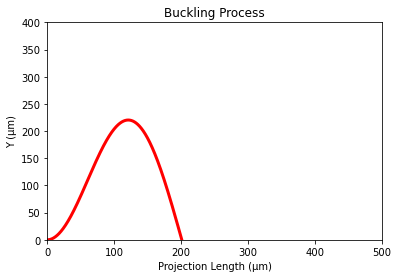

In [6]:
fig = plt.figure()

axis = plt.axes(xlim = (0, 500), 
                xlabel = "Projection Length (μm)",
                ylim = (0, 400),
                ylabel = "Y (μm)",
                title = "Buckling Process")

line, = axis.plot([],[], lw = 3)

def init():
    line.set_data([], [])
    line.set_color("red")
    return line,

def animate(i): 
    L = 500 - i
    
    x = np.arange(0, L, 0.1)
    y = list(map(f(L), x))
    
    line.set_data(x, y)
    
    return line,

anim = an.FuncAnimation(fig, animate, init_func = init, frames = 300, interval = 20, blit = True)

anim.save("buckling.mp4", writer = "ffmpeg", fps = 30)

Buckling Figure

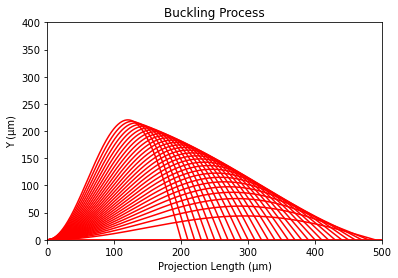

In [ ]:
fig = plt.figure()

axis = plt.axes(xlim = (0, 500), 
                xlabel = "Projection Length (μm)",
                ylim = (0, 400),
                ylabel = "Y (μm)",
                title = "Buckling Process")

for L in range(200, 501, 10):
    x = np.arange(0, L, 0.1)
    y = list(map(f(L), x))
    
    axis.plot(x, y, "red")

plt.savefig("buckling.png")